In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import csv
import numpy as np
from scipy.stats import linregress

#Study files

music_norm_path = "songs_normalize.csv"

music_norm = pd.read_csv(music_norm_path, encoding = "utf-8-sig")

music_norm.head(-1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.0,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.0,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.0,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.0,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.0,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,Post Malone,Goodbyes (Feat. Young Thug),174960,True,2019,1,0.580,0.653,5,-3.818,1,0.0745,0.4470,0.0,0.1110,0.175,150.231,hip hop
1973,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.0,0.1060,0.952,137.958,pop
1974,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.0,0.1050,0.564,169.994,pop
1975,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.0,0.2740,0.811,97.984,"hip hop, country"


## Cleaning the Dataset

In [3]:
# Drop unused columns
music_norm = music_norm.drop(columns=['explicit', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'])

In [4]:
music_norm

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,2000,77,1,-5.444,0,0.894,95.053,pop
1,blink-182,All The Small Things,167066,1999,79,0,-4.918,1,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,1999,66,7,-9.007,1,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,2000,78,0,-4.063,0,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,2000,65,8,-4.806,0,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...
1973,Jonas Brothers,Sucker,181026,2019,79,1,-5.065,0,0.952,137.958,pop
1974,Taylor Swift,Cruel Summer,178426,2019,78,9,-5.707,1,0.564,169.994,pop
1975,Blanco Brown,The Git Up,200593,2019,69,9,-8.635,1,0.811,97.984,"hip hop, country"
1976,Sam Smith,Dancing With A Stranger (with Normani),171029,2019,75,8,-7.513,1,0.347,102.998,pop


In [5]:
# Check for null values
missing_data_count = music_norm.isna().sum()
missing_data_count

#There is none (see below)

artist         0
song           0
duration_ms    0
year           0
popularity     0
key            0
loudness       0
mode           0
valence        0
tempo          0
genre          0
dtype: int64

In [6]:
# Check for duplicated rows
duplicated_rows = music_norm.duplicated()
music_norm[duplicated_rows].sort_values("song")

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
989,Lady Gaga,Bad Romance,294573,2009,80,0,-3.755,1,0.714,119.001,pop
1962,Post Malone,Better Now,231266,2018,80,10,-5.804,1,0.341,145.038,hip hop
1812,Jax Jones,Breathe,207629,2017,58,11,-5.520,0,0.686,125.985,"hip hop, pop, Dance/Electronic"
961,James Morrison,Broken Strings,250453,2008,70,1,-4.914,1,0.321,111.910,"pop, R&B"
1429,Ellie Goulding,Burn,231211,2014,70,1,-5.031,1,0.329,87.016,"pop, rock, Dance/Electronic"
1712,Rob $tone,Chill Bill (feat. J. Davi$ & Spooks),177184,2016,76,6,-10.028,1,0.230,108.034,hip hop
371,Coldplay,Clocks,307879,2002,79,5,-7.215,0,0.255,130.970,"rock, pop"
817,Soulja Boy,Crank That (Soulja Boy),221933,2007,74,0,-2.180,1,0.803,140.141,"hip hop, pop"
798,September,Cry for You,209800,2007,65,9,-3.988,1,0.961,130.018,"pop, Dance/Electronic"
687,The All-American Rejects,Dirty Little Secret,193653,2005,65,10,-4.253,1,0.462,143.853,"rock, pop"


In [7]:
# drop duplicated values
music_norm = music_norm.drop_duplicates()
music_norm

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,2000,77,1,-5.444,0,0.894,95.053,pop
1,blink-182,All The Small Things,167066,1999,79,0,-4.918,1,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,1999,66,7,-9.007,1,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,2000,78,0,-4.063,0,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,2000,65,8,-4.806,0,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...
1973,Jonas Brothers,Sucker,181026,2019,79,1,-5.065,0,0.952,137.958,pop
1974,Taylor Swift,Cruel Summer,178426,2019,78,9,-5.707,1,0.564,169.994,pop
1975,Blanco Brown,The Git Up,200593,2019,69,9,-8.635,1,0.811,97.984,"hip hop, country"
1976,Sam Smith,Dancing With A Stranger (with Normani),171029,2019,75,8,-7.513,1,0.347,102.998,pop


### Find all unique genres

In [8]:
unique_genre = len(music_norm["genre"].unique())
unique_genre

58

In [9]:
unique_artists = music_norm["artist"].unique()
unique_artists 

array(['Britney Spears', 'blink-182', 'Faith Hill', 'Bon Jovi', '*NSYNC',
       'Sisqo', 'Eminem', 'Robbie Williams', "Destiny's Child", 'Modjo',
       "Gigi D'Agostino", 'Eiffel 65', "Bomfunk MC's", 'Sting',
       'Melanie C', 'Aaliyah', 'Anastacia', 'Alice Deejay', 'Dr. Dre',
       'Linkin Park', 'Tom Jones', 'Sonique', 'M.O.P.', 'Limp Bizkit',
       'Darude', 'Da Brat', 'Moloko', 'Chicane', 'DMX', 'Debelah Morgan',
       'Madonna', 'Ruff Endz', 'Montell Jordan', 'Kylie Minogue', 'JAY-Z',
       'LeAnn Rimes', 'Avant', 'Enrique Iglesias', 'Toni Braxton',
       'Bow Wow', 'Missy Elliott', 'Backstreet Boys', 'Samantha Mumba',
       'Mýa', 'Mary Mary', 'Next', 'Janet Jackson', 'Ricky Martin',
       'Jagged Edge', 'Mariah Carey', 'Baha Men', 'Donell Jones', 'Oasis',
       'DJ Ötzi', 'P!nk', 'Craig David', 'Christina Aguilera',
       'Red Hot Chili Peppers', 'Sammie', 'Santana', 'Kandi', 'Vengaboys',
       'Ronan Keating', 'Madison Avenue', 'Céline Dion', '3 Doors Down',
     

In [10]:
# unique_song = music_norm["song"].unique().sort_values()
# unique_song
unique_song = music_norm["song"].unique()
print(sorted(unique_song))

['#SELFIE - Original Mix', '#thatPOWER', "'Till I Collapse", '(When You Gonna) Give It Up to Me (feat. Keyshia Cole) - Radio Version', '...Ready For It?', "03' Bonnie & Clyde", '1 Thing', '1, 2 Step (feat. Missy Elliott) - Main', '1, 2, 3 (feat. Jason Derulo & De La Ghetto)', '17', '1955', '1973', '2 On (feat. ScHoolboy Q)', '2 Phones', '2002', '21 Guns', '21 Questions', '21 Seconds', '212', '22', '24K Magic', '2U (feat. Justin Bieber)', '3 Nights', '3005', '4 Minutes (feat. Justin Timberlake & Timbaland)', '4 My People (feat. Eve)', '6 Foot 7 Foot', '679 (feat. Remy Boyz)', '7 Days', '7 rings', '711', 'A Little Less Conversation - JXL Radio Edit Remix', 'A Milli', 'A Moment Like This', 'A New Day Has Come - Radio Remix', 'A Sky Full of Stars', 'A Thousand Miles', 'A Thousand Years', "A Woman's Worth", 'AM To PM', 'About You Now', "Acceptable in the 80's", 'Adan y Eva', 'Addicted', 'Addictive', 'Adventure of a Lifetime', 'Again', 'Against All Odds (Take A Look at Me Now) (feat. Westlif

In [11]:
def filter_genre(genre): 
    # genre='rock'
    filter_df=music_norm['genre'].str.contains(genre)
    small_df=music_norm.loc[filter_df, :]
    small_df.head()
    return len(small_df)

In [12]:
genre_list=music_norm['genre'].str.split(', ').explode().unique()
genre_list

array(['pop', 'rock', 'country', 'metal', 'hip hop', 'R&B',
       'Dance/Electronic', 'Folk/Acoustic', 'easy listening', 'latin',
       'blues', 'World/Traditional', 'jazz', 'classical'], dtype=object)

In [13]:
for each_genre in genre_list: 
    count=filter_genre(each_genre)
    print(f'{each_genre} contains {count} records')

pop contains 1582 records
rock contains 225 records
country contains 20 records
metal contains 64 records
hip hop contains 751 records
R&B contains 437 records
Dance/Electronic contains 380 records
Folk/Acoustic contains 20 records
easy listening contains 7 records
latin contains 63 records
blues contains 4 records
World/Traditional contains 10 records
jazz contains 2 records
classical contains 1 records


In [14]:
# Split the values in the column
genres = music_norm["genre"].str.split(',', expand=True)
# Convert the list of values into separate rows
# genres = genres.explode("genre")
# Find the unique values
# genres.unique()

In [15]:
genres #test

,0,1,2,3
0,pop,None,None,None
1,rock,pop,None,None
2,pop,country,None,None
3,rock,metal,None,None
4,pop,None,None,None
...,...,...,...,...
1973,pop,None,None,None
1974,pop,None,None,None
1975,hip hop,country,None,None
1976,pop,None,None,None


### Analyzing Popularity

#### Popular genre & how they have changed from 1998 to 2020 - Grace

In [18]:
# Grab genre and year and create a new dataframe.
genre_pop_year = music_norm.loc[:,["year","genre","popularity"]]
genre_pop_year

,year,genre,popularity
0,2000,pop,77
1,1999,"rock, pop",79
2,1999,"pop, country",66
3,2000,"rock, metal",78
4,2000,pop,65
...,...,...,...
1973,2019,pop,79
1974,2019,pop,78
1975,2019,"hip hop, country",69
1976,2019,pop,75


In [19]:
genre_list

array(['pop', 'rock', 'country', 'metal', 'hip hop', 'R&B',
       'Dance/Electronic', 'Folk/Acoustic', 'easy listening', 'latin',
       'blues', 'World/Traditional', 'jazz', 'classical'], dtype=object)

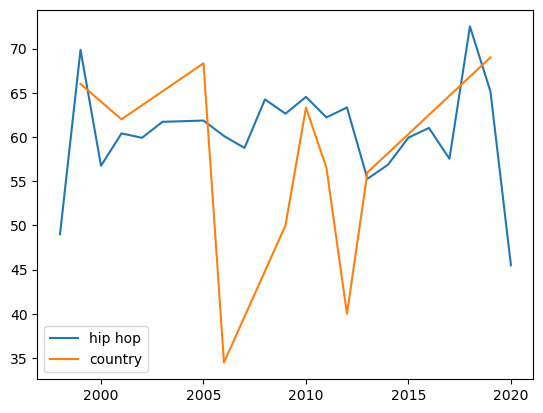

In [20]:
#attempting one by one
#HIP HOP
filter_df=genre_pop_year['genre'].str.contains("hip hop")
small_df=genre_pop_year.loc[filter_df, :]
small_df.head(20)
# Get average popularity of this genre per year
yearly_popularity = small_df.groupby("year").mean()
yearly_popularity
# Plot average popularity vs. year. 
plt.plot(yearly_popularity.index, yearly_popularity["popularity"], label="hip hop")

# Country
filter_df=genre_pop_year['genre'].str.contains("country")
small_df=genre_pop_year.loc[filter_df, :]
small_df.head(20)
# Get average popularity of this genre per year
yearly_popularity = small_df.groupby("year").mean()
yearly_popularity
# Plot average popularity vs. year. 
plt.plot(yearly_popularity.index, yearly_popularity["popularity"], label="country")

#graphing stuff
plt.legend()

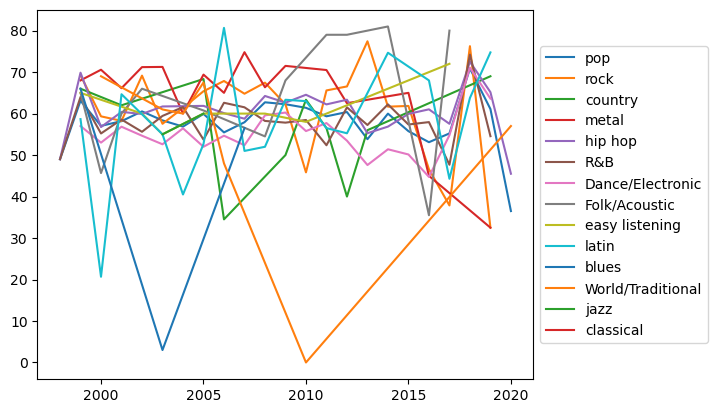

In [27]:
for genre in genre_list:
    filter_df=genre_pop_year['genre'].str.contains(genre)
    small_df=genre_pop_year.loc[filter_df, :]
    # Get average popularity of this genre per year
    yearly_popularity = small_df.groupby("year").mean()
    yearly_popularity
    # Plot average popularity vs. year. 
    plt.plot(yearly_popularity.index, yearly_popularity["popularity"], label=genre)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

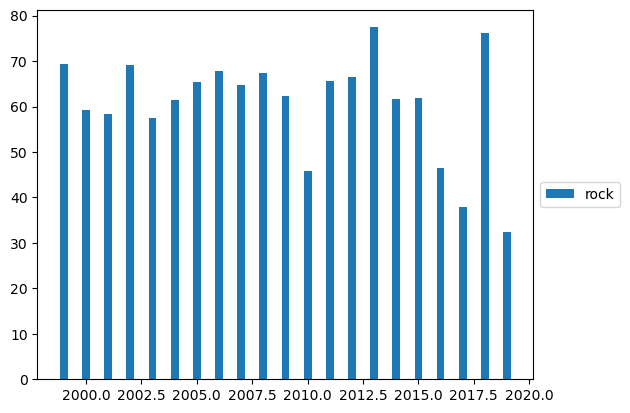

In [25]:
# Create a stacked bar chart for just one genre (rock)
# Filter for genre (rock)
genre_filter=genre_pop_year['genre'].str.contains("rock")
small_df=genre_pop_year.loc[genre_filter, :]  

# Grab average popularity for this genre for each year, and store in popularity_list. 
popularity_list = small_df.groupby("year").mean()

# Create a stacked bar chart
fig, ax = plt.subplots()
width = .35

# Plot based on values found
ax.bar(popularity_list.index, popularity_list["popularity"], width, label="rock")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

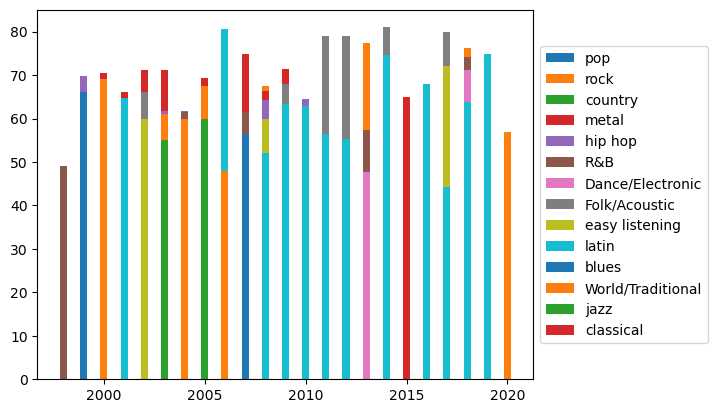

In [28]:
# Create a stacked bar chart for all genres
# Prepare stacked bar chart
fig, ax = plt.subplots()
width = .35

# For loop to grab all genres
for genre in genre_list:
    # Filter for genre (rock)
    genre_filter=genre_pop_year['genre'].str.contains(genre)
    small_df=genre_pop_year.loc[genre_filter, :]  
    # Grab average popularity for this genre for each year, and store in popularity_list. 
    popularity_list = small_df.groupby("year").mean()
    # Plot based on values found
    ax.bar(popularity_list.index, popularity_list["popularity"], width, label=genre)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.figure(figsize=(1, 2))

#### Length of Song vs Popularity - Daniel

#### Loudness vs popularity - Bree

### Analyzing By the Year

#### Loudness vs year- Daniel

####	Duration vs Year- Bree



####	Avg bpm vs year - Grace


The r-value (aka correlation coefficient) is 0.08, which indicates a very weak correlation. This suggests there is no correlation between average BPM and year.


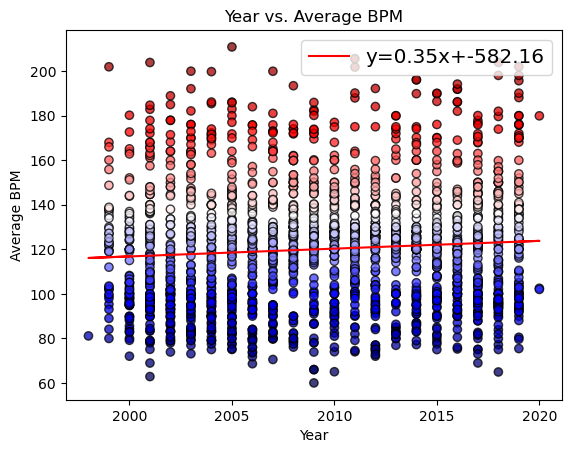

In [49]:
# Create scatterplot for average bpm vs. year. 
plt.scatter(music_norm["year"], music_norm["tempo"], edgecolors='black', alpha=.75, c=music_norm["tempo"], cmap="seismic")

plt.xlabel("Year")
plt.ylabel("Average BPM")
plt.title("Year vs. Average BPM")

#find linear regression + regression values
slope, intercept, rvalue, pavalue, stderr = linregress(music_norm["year"], music_norm["tempo"])
regress_values = music_norm["year"] * slope + intercept  

#plot linear regression line & label
plt.plot(music_norm["year"], regress_values,"r", label="y={:.2f}x+{:.2f}".format(slope, intercept)) 
plt.legend(fontsize = "x-large")

print(f"The r-value (aka correlation coefficient) is {round(rvalue,2)}, which indicates a very weak correlation. This suggests there is no correlation between average BPM and year.")


In [50]:
# Look at min/max of bpm to determine bin ranges. 
music_norm.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,228911.430738,2009.496967,59.899393,0.666642,0.720159,5.395349,-5.508532,0.553084,0.103998,0.128374,0.014919,0.181435,0.550449,120.122442
std,39075.190062,5.865569,21.403924,0.140533,0.152732,3.607924,1.937142,0.497300,0.096452,0.172742,0.086967,0.141005,0.220790,26.965727
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203754.500000,2004.000000,56.000000,0.581000,0.622250,2.000000,-6.481000,0.000000,0.039600,0.014000,0.000000,0.088250,0.386000,98.985250
50%,223339.500000,2010.000000,66.000000,0.676000,0.736000,6.000000,-5.283500,1.000000,0.060150,0.055350,0.000000,0.124000,0.556000,120.017500
75%,248359.750000,2015.000000,73.000000,0.762000,0.838000,8.000000,-4.167250,1.000000,0.130750,0.176000,0.000000,0.241000,0.727750,134.398500
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.990000,0.853000,0.973000,210.851000


In [16]:
# Grab only the values needed and place in new dataframe. 
year_bpm = music_norm.loc[:,["year","tempo"]]

# Create a bin for bpms
bins = [60,90,120,150,180,210,240]
bpm_ranges = ["60 to 90 BPM","90 to 120 BPM","120 to 150 BPM","150 to 180 BPM","180 to 210 BPM","210 to 240 BPM"]

# Use pd.cut to place songs in bpm bins, and place df. 
year_bpm["BPM Ranges"] = pd.cut(year_bpm["tempo"], bins, labels=bpm_ranges,include_lowest=True)

Conclusion: Generally speaking, songs within the 90 to 150 BPM range are more popular
             than songs below 90 BPM and above 160 BPM. It is notable that around 2013
             to 2014, songs in the range fo 120 to 180 BPM shot up in popularity.


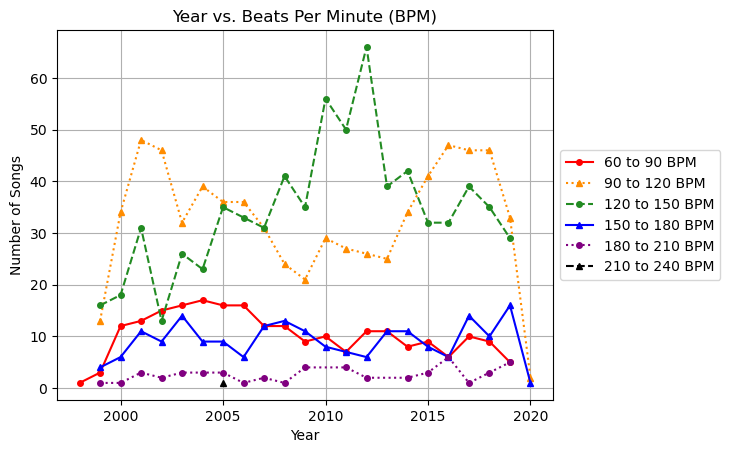

In [17]:
# Create color list, line style list, and counter for the for loop
colors = ["red","darkorange","forestgreen", "blue", "purple", "black"]
line_styles = ["-",":","--"] # for accessibility
markers = ["o","^"] # for accessibility
counter = 0

# For every bpm range, create a line chart plotting year as the x-axis and the number of counts as the y axis. 
for bpm_range in bpm_ranges:
    # Grab the range in a new dataframe
    df = year_bpm[year_bpm["BPM Ranges"] == bpm_range]
    # Get number of counts per year. 
    yearly_counts = df.groupby("year").size() 
    # Plot 
    yearly_counts.plot(kind="line", 
                       marker=markers[counter % 2], # Use modulo % to repeatedly iterate. 
                       markersize=4,
                       color=colors[counter], 
                       linestyle=line_styles[counter % 3], 
                       label= bpm_range)
    # Progress counter
    counter = counter + 1
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.ylabel("Number of Songs")
plt.title("Year vs. Beats Per Minute (BPM)")
plt.xlabel("Year")
print("""Conclusion: Generally speaking, songs within the 90 to 150 BPM range are more popular
             than songs below 90 BPM and above 160 BPM. It is notable that around 2013
             to 2014, songs in the range of 120 to 180 BPM shot up in popularity.""")

####	Valence vs Year- Pooja

### Analyzing Key/mode 



#### Key/mode vs. popularity - Pooja


#### Key/mode vs artist - Kiana 


#### Key/mode vs year - Kiana